In [94]:
# ! pip install scikit-learn

In [95]:
# ! pip install matplotlib

In [ ]:
# ! pip install folium


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import folium
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [98]:
df = pd.read_csv('finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [99]:
df.shape

(45584, 20)

In [100]:
# plt.bar(x=df['Type_of_order'], height=df['Time_taken (min)'])
# plt.show()

In [101]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [103]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [104]:
for i in df.columns:
    print(f"unique values: {[i]} = {df[i].nunique()}")
    print("-----------------------------------------------")
    if (df[i].unique().size < 8) :
        print(f"{df[i].nunique()}")
    else:
        pass

unique values: ['ID'] = 45584
-----------------------------------------------
unique values: ['Delivery_person_ID'] = 1320
-----------------------------------------------
unique values: ['Delivery_person_Age'] = 22
-----------------------------------------------
unique values: ['Delivery_person_Ratings'] = 28
-----------------------------------------------
unique values: ['Restaurant_latitude'] = 657
-----------------------------------------------
unique values: ['Restaurant_longitude'] = 518
-----------------------------------------------
unique values: ['Delivery_location_latitude'] = 4373
-----------------------------------------------
unique values: ['Delivery_location_longitude'] = 4373
-----------------------------------------------
unique values: ['Order_Date'] = 44
-----------------------------------------------
unique values: ['Time_Orderd'] = 176
-----------------------------------------------
unique values: ['Time_Order_picked'] = 193
----------------------------------------

In [105]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [106]:
feature = []
dtype = []
count = []
unique = []
missing = []
missing_percentage = []

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    missing_percentage.append(((df[column].isnull().sum())/df.shape[0]) *100)
    dtype.append(df[column].dtypes)
    unique.append(df[column].nunique())

dataframe = pd.DataFrame({
    'features':feature,
    'missing':missing,
    'missing_percentage':missing_percentage,
    'unique':unique,
    'count':count,
    'dtype':dtype
})
dataframe.set_index('features')
dataframe

,features,missing,missing_percentage,unique,count,dtype
0,ID,0,0.000000,45584,45584,object
1,Delivery_person_ID,0,0.000000,1320,45584,object
2,Delivery_person_Age,1854,4.067217,22,45584,float64
3,Delivery_person_Ratings,1908,4.185679,28,45584,float64
4,Restaurant_latitude,0,0.000000,657,45584,float64
5,Restaurant_longitude,0,0.000000,518,45584,float64
6,Delivery_location_latitude,0,0.000000,4373,45584,float64
7,Delivery_location_longitude,0,0.000000,4373,45584,float64
8,Order_Date,0,0.000000,44,45584,object
9,Time_Orderd,1731,3.797385,176,45584,object


In [107]:
df.drop('ID',axis=1,inplace=True)

In [108]:
df['Order_Date']

0        12-02-2022
1        13-02-2022
2        04-03-2022
3        13-02-2022
4        14-02-2022
            ...    
45579    24-03-2022
45580    16-02-2022
45581    11-03-2022
45582    07-03-2022
45583    02-03-2022
Name: Order_Date, Length: 45584, dtype: object

In [109]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format = '%d-%m-%Y')

In [110]:
df['year']=(df['Order_Date']).dt.year
df['month']=df['Order_Date'].dt.month
df['day']=df['Order_Date'].dt.day


In [111]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [112]:
df.drop('Order_Date',axis=1,inplace=True)

In [113]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [114]:
df.dropna(inplace=True)

In [115]:
df.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
year                           0
month                          0
day                            0
dtype: int64

In [116]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')


In [117]:
df['Time_Orderd'].sample(5)

45302    08:10
19944    17:50
20527    19:40
42237    20:10
12309    18:10
Name: Time_Orderd, dtype: object

In [118]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)
df['Time_Orderd'].sample(5)

41546    21:10
43121    19:55
11852    17:45
33574    22:10
83        0:95
Name: Time_Orderd, dtype: object

In [119]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'],format = '%H-%M-%S', errors='ignore')

In [120]:
df['Time_Orderd_hours'] = df['Time_Orderd'].str.split(':',expand=True)[0]
df['Time_Orderd_hours'] = df['Time_Orderd_hours'].replace('0','00')
df['Time_Orderd_hours'] = df['Time_Orderd_hours'].astype('int32')


df['Time_Orderd_min'] = df['Time_Orderd'].str.split(':',expand=True)[1]
df['Time_Orderd_min'] = df['Time_Orderd_min'].astype('int32')


# df['Time_Orderd_second'] = df['Time_Orderd'].str.split(':',expand=True)[2]
# df['Time_Orderd_second'] = df['Time_Orderd_second'].replace('0','00')
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,Time_Orderd_hours,Time_Orderd_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [121]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.',':')
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)


In [122]:
df['Time_Orderd_picked_hours'] = df['Time_Order_picked'].str.split(':',expand=True)[0]
df['Time_Orderd_picked_hours'] = df['Time_Orderd_picked_hours'].replace('0','00')
df['Time_Orderd_picked_hours'] = df['Time_Orderd_picked_hours'].astype('int32')


df['Time_Orderd_picked_min'] = df['Time_Order_picked'].str.split(':',expand=True)[1]
df['Time_Orderd_picked_min'] = df['Time_Orderd_picked_min'].astype('int32')

df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Festival,City,Time_taken (min),year,month,day,Time_Orderd_hours,Time_Orderd_min,Time_Orderd_picked_hours,Time_Orderd_picked_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,No,Metropolitian,46,2022,2,12,21,55,22,10
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,No,Metropolitian,23,2022,2,13,14,55,15,5
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,No,Metropolitian,21,2022,3,4,17,30,17,40
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,No,Metropolitian,20,2022,2,13,9,20,9,30
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,No,Metropolitian,41,2022,2,14,19,50,20,5


In [123]:
df['Delivery_city'] = df['Delivery_person_ID'].str.split('RES',expand=True)[0]
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,Time_Orderd_hours,Time_Orderd_min,Time_Orderd_picked_hours,Time_Orderd_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,2,12,21,55,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,3,4,17,30,17,40,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [124]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'KOL', 'RANCHI',
       'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'HYD', 'AURG', 'AGR',
       'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [126]:
folium.Map(tiles='cartodb positron')

In [131]:
import seaborn as sns


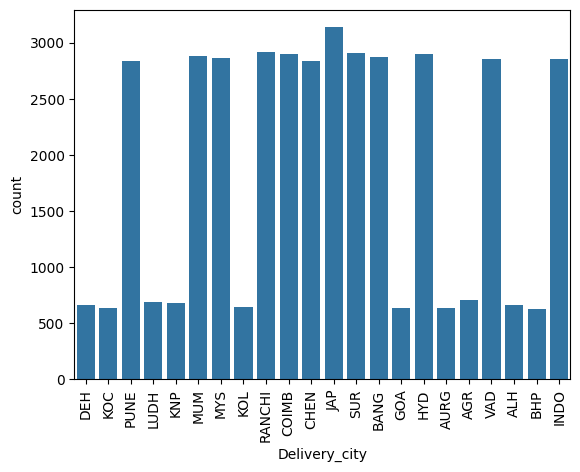

In [137]:
sns.countplot(x=df['Delivery_city'])
plt.xticks(rotation=90)
plt.show()